<a href="https://colab.research.google.com/github/2303a52071/statml-2025/blob/main/2303a52071_statproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
d = pd.read_csv('/content/kidney_disease.csv')
d.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
y = d['classification']
x = d.drop(['classification'], axis=1)
x

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,11.3,38,6000,NaN,no,no,no,good,no,no
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,9.6,31,7500,NaN,no,yes,no,poor,no,yes
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,11.6,35,7300,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,15.7,47,6700,4.9,no,no,no,good,no,no
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,16.5,54,7800,6.2,no,no,no,good,no,no
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,15.8,49,6600,5.4,no,no,no,good,no,no
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,14.2,51,7200,5.9,no,no,no,good,no,no


In [ ]:
y

,classification
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [ ]:
# prompt: convert all string to int in the data

for column in x.columns:
    if x[column].dtype == 'object':
        try:
            x[column] = x[column].astype(int)
        except ValueError:
            # Handle cases where conversion to int is not possible
            # e.g., replace with NaN, use a different strategy etc.
            x[column] = pd.to_numeric(x[column], errors='coerce')

In [ ]:
x

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,NaN,NaN,NaN,NaN,...,15.4,44.0,7800.0,5.2,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7.0,50.0,1.020,4.0,0.0,NaN,NaN,NaN,NaN,...,11.3,38.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,62.0,80.0,1.010,2.0,3.0,NaN,NaN,NaN,NaN,...,9.6,31.0,7500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,48.0,70.0,1.005,4.0,0.0,NaN,NaN,NaN,NaN,...,11.2,32.0,6700.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN
4,4,51.0,80.0,1.010,2.0,0.0,NaN,NaN,NaN,NaN,...,11.6,35.0,7300.0,4.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,NaN,NaN,NaN,NaN,...,15.7,47.0,6700.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN
396,396,42.0,70.0,1.025,0.0,0.0,NaN,NaN,NaN,NaN,...,16.5,54.0,7800.0,6.2,NaN,NaN,NaN,NaN,NaN,NaN
397,397,12.0,80.0,1.020,0.0,0.0,NaN,NaN,NaN,NaN,...,15.8,49.0,6600.0,5.4,NaN,NaN,NaN,NaN,NaN,NaN
398,398,17.0,60.0,1.025,0.0,0.0,NaN,NaN,NaN,NaN,...,14.2,51.0,7200.0,5.9,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Training Features:", x_train)
print("Training Target:", y_train)
print("Testing Features:", x_test)
print("Testing Target:", y_test)

Training Features:       id   age     bp     sg   al   su  rbc  pc  pcc  ba  ...  hemo   pcv  \
3      3  48.0   70.0  1.005  4.0  0.0  NaN NaN  NaN NaN  ...  11.2  32.0   
18    18  60.0  100.0  1.025  0.0  3.0  NaN NaN  NaN NaN  ...  12.7  37.0   
202  202  78.0   60.0    NaN  NaN  NaN  NaN NaN  NaN NaN  ...   8.0  24.0   
250  250  40.0   80.0  1.025  0.0  0.0  NaN NaN  NaN NaN  ...  15.0  48.0   
274  274  19.0   80.0  1.020  0.0  0.0  NaN NaN  NaN NaN  ...  14.4  44.0   
..   ...   ...    ...    ...  ...  ...  ...  ..  ...  ..  ...   ...   ...   
71    71  46.0   60.0  1.010  1.0  0.0  NaN NaN  NaN NaN  ...   9.8  28.0   
106  106  50.0   90.0    NaN  NaN  NaN  NaN NaN  NaN NaN  ...   6.0  17.0   
270  270  23.0   80.0  1.025  0.0  0.0  NaN NaN  NaN NaN  ...  14.3  41.0   
348  348  38.0   80.0  1.020  0.0  0.0  NaN NaN  NaN NaN  ...  13.6  44.0   
102  102  17.0   60.0  1.010  0.0  0.0  NaN NaN  NaN NaN  ...  13.9  52.0   

          wc   rc  htn  dm  cad  appet  pe  ane  
3     

In [ ]:
# prompt: convert all nan to 0

x = x.fillna(0)

In [ ]:
x_min = x_train.min()
x_max = x_train.max()
x_train = (x_train - x_min) / (x_max - x_min)
x_test = (x_test - x_min) / (x_max - x_min)
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)
x_train
#normalisation and nan

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,0.005025,0.522727,0.153846,0.00,0.8,0.0,0.0,0.0,0.0,0.0,...,0.551020,0.511111,0.185950,0.305085,0.0,0.0,0.0,0.0,0.0,0.0
18,0.042714,0.659091,0.384615,1.00,0.0,0.6,0.0,0.0,0.0,0.0,...,0.653061,0.622222,0.380165,0.372881,0.0,0.0,0.0,0.0,0.0,0.0
202,0.505025,0.863636,0.076923,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
250,0.625628,0.431818,0.230769,1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.809524,0.866667,0.338843,0.406780,0.0,0.0,0.0,0.0,0.0,0.0
274,0.685930,0.193182,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.0,...,0.768707,0.777778,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.175879,0.500000,0.076923,0.25,0.2,0.0,0.0,0.0,0.0,0.0,...,0.455782,0.422222,0.512397,0.186441,0.0,0.0,0.0,0.0,0.0,0.0
106,0.263819,0.545455,0.307692,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197279,0.177778,0.177686,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
270,0.675879,0.238636,0.230769,1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.761905,0.711111,0.206612,0.491525,0.0,0.0,0.0,0.0,0.0,0.0
348,0.871859,0.409091,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.0,...,0.714286,0.777778,0.210744,0.728814,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#svm
svm_model = SVC()
test_sizes = [0.1176, 0.1180, 0.1178, 0.1179]
for test_size in test_sizes:
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
   svm_model.fit(x_train, y_train)
   svm_predictions = svm_model.predict(x_test)
   svm_accuracy = accuracy_score(y_test, svm_predictions)
   svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
   svm_classification_report = classification_report(y_test, svm_predictions)
   print(f"Accuracy with test size {test_size}: {svm_accuracy}")
   print("SVM Confusion Matrix:\n", svm_confusion_matrix)
   print("SVM Classification Report:\n", svm_classification_report)

Accuracy with test size 0.1176: 0.7291666666666666
SVM Confusion Matrix:
 [[19 13]
 [ 0 16]]
SVM Classification Report:
               precision    recall  f1-score   support

         ckd       1.00      0.59      0.75        32
      notckd       0.55      1.00      0.71        16

    accuracy                           0.73        48
   macro avg       0.78      0.80      0.73        48
weighted avg       0.85      0.73      0.73        48

Accuracy with test size 0.118: 0.7291666666666666
SVM Confusion Matrix:
 [[19 13]
 [ 0 16]]
SVM Classification Report:
               precision    recall  f1-score   support

         ckd       1.00      0.59      0.75        32
      notckd       0.55      1.00      0.71        16

    accuracy                           0.73        48
   macro avg       0.78      0.80      0.73        48
weighted avg       0.85      0.73      0.73        48

Accuracy with test size 0.1178: 0.7291666666666666
SVM Confusion Matrix:
 [[19 13]
 [ 0 16]]
SVM Classifi

In [ ]:
#logistic regression
logreg = LogisticRegression()
test_sizes = [0.159, 0.27, 0.3679, 0.4215]
for test_size in test_sizes:
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=69)
   x_train.fillna(0, inplace=True)
   x_test.fillna(0, inplace=True)
   logreg.fit(x_train, y_train)
   logreg_predictions = logreg.predict(x_test)
   logreg_accuracy = accuracy_score(y_test, logreg_predictions)
   logreg_confusion_matrix = confusion_matrix(y_test, logreg_predictions)
   logreg_classification_report = classification_report(y_test, logreg_predictions)
   print(f"Accuracy with test size {test_size}: {logreg_accuracy}")
   print("Logistic Regression Confusion Matrix:\n", logreg_confusion_matrix)
   print("Logistic regression Classification Report:\n", logreg_classification_report)

Accuracy with test size 0.159: 0.984375
Logistic Regression Confusion Matrix:
 [[42  0]
 [ 1 21]]
Logistic regression Classification Report:
               precision    recall  f1-score   support

         ckd       0.98      1.00      0.99        42
      notckd       1.00      0.95      0.98        22

    accuracy                           0.98        64
   macro avg       0.99      0.98      0.98        64
weighted avg       0.98      0.98      0.98        64

Accuracy with test size 0.27: 0.9351851851851852
Logistic Regression Confusion Matrix:
 [[68  5]
 [ 2 33]]
Logistic regression Classification Report:
               precision    recall  f1-score   support

         ckd       0.97      0.93      0.95        73
      notckd       0.87      0.94      0.90        35

    accuracy                           0.94       108
   macro avg       0.92      0.94      0.93       108
weighted avg       0.94      0.94      0.94       108

Accuracy with test size 0.3679: 0.9391891891891891
Lo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
perceptron = Perceptron(max_iter=1999)
test_sizes = [0.57, 0.78, 0.92, 0.84]
for test_size in test_sizes:
   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=59)
   x_train.fillna(0, inplace=True)
   x_test.fillna(0, inplace=True)
   perceptron.fit(x_train, y_train)
   perceptron_predictions = perceptron.predict(x_test)
   perceptron_accuracy = accuracy_score(y_test, perceptron_predictions)
   perceptron_confusion_matrix = confusion_matrix(y_test, perceptron_predictions)
   perceptron_classification_report = classification_report(y_test, perceptron_predictions)
   print(f"Accuracy with test size {test_size}: {perceptron_accuracy}")
   print("Perceptron Confusion Matrix:\n", perceptron_confusion_matrix)
   print("Perceptron Classification Report:\n", perceptron_classification_report)

Accuracy with test size 0.57: 0.5526315789473685
Perceptron Confusion Matrix:
 [[123  20]
 [ 82   3]]
Perceptron Classification Report:
               precision    recall  f1-score   support

         ckd       0.60      0.86      0.71       143
      notckd       0.13      0.04      0.06        85

    accuracy                           0.55       228
   macro avg       0.37      0.45      0.38       228
weighted avg       0.42      0.55      0.46       228

Accuracy with test size 0.78: 0.592948717948718
Perceptron Confusion Matrix:
 [[164  29]
 [ 98  21]]
Perceptron Classification Report:
               precision    recall  f1-score   support

         ckd       0.63      0.85      0.72       193
      notckd       0.42      0.18      0.25       119

    accuracy                           0.59       312
   macro avg       0.52      0.51      0.48       312
weighted avg       0.55      0.59      0.54       312

Accuracy with test size 0.92: 0.5054347826086957
Perceptron Confusion Mat

In [ ]:
# so, svm is best fit
#logistic overfit
#perceptron underfit


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
test_sizes = [0.57, 0.78, 0.92, 0.84]

for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=59)
    x_train.fillna(0, inplace=True)  # Handle NaN values if any
    x_test.fillna(0, inplace=True)

    knn_classifier.fit(x_train, y_train)
    knn_predictions = knn_classifier.predict(x_test)

    knn_accuracy = accuracy_score(y_test, knn_predictions)
    knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
    knn_classification_report = classification_report(y_test, knn_predictions)

    print(f"Accuracy with test size {test_size}: {knn_accuracy}")
    print("KNN Confusion Matrix:\n", knn_confusion_matrix)
    print("KNN Classification Report:\n", knn_classification_report)

Accuracy with test size 0.57: 0.8070175438596491
KNN Confusion Matrix:
 [[112  31]
 [ 13  72]]
KNN Classification Report:
               precision    recall  f1-score   support

         ckd       0.90      0.78      0.84       143
      notckd       0.70      0.85      0.77        85

    accuracy                           0.81       228
   macro avg       0.80      0.82      0.80       228
weighted avg       0.82      0.81      0.81       228

Accuracy with test size 0.78: 0.7467948717948718
KNN Confusion Matrix:
 [[151  42]
 [ 37  82]]
KNN Classification Report:
               precision    recall  f1-score   support

         ckd       0.80      0.78      0.79       193
      notckd       0.66      0.69      0.67       119

    accuracy                           0.75       312
   macro avg       0.73      0.74      0.73       312
weighted avg       0.75      0.75      0.75       312

Accuracy with test size 0.92: 0.6222826086956522
KNN Confusion Matrix:
 [[154  76]
 [ 63  75]]
KNN C

In [ ]:
# prompt: apply pca and compare accuracies before and after

from sklearn.decomposition import PCA

# Apply PCA with a desired number of components
pca = PCA(n_components=10)  # You can adjust the number of components
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train and evaluate SVM with PCA
svm_model_pca = SVC()
svm_model_pca.fit(x_train_pca, y_train)
svm_predictions_pca = svm_model_pca.predict(x_test_pca)
svm_accuracy_pca = accuracy_score(y_test, svm_predictions_pca)

print("SVM Accuracy with PCA:", svm_accuracy_pca)
print("SVM Accuracy without PCA:", svm_accuracy) # Assuming svm_accuracy from previous code


# Train and evaluate Logistic Regression with PCA
logreg_pca = LogisticRegression()
logreg_pca.fit(x_train_pca, y_train)
logreg_predictions_pca = logreg_pca.predict(x_test_pca)
logreg_accuracy_pca = accuracy_score(y_test, logreg_predictions_pca)

print("Logistic Regression Accuracy with PCA:", logreg_accuracy_pca)
# Assuming logreg_accuracy from previous code
print("Logistic Regression Accuracy without PCA:", logreg_accuracy)


# Train and evaluate Perceptron with PCA
perceptron_pca = Perceptron(max_iter=1999)
perceptron_pca.fit(x_train_pca, y_train)
perceptron_predictions_pca = perceptron_pca.predict(x_test_pca)
perceptron_accuracy_pca = accuracy_score(y_test, perceptron_predictions_pca)

print("Perceptron Accuracy with PCA:", perceptron_accuracy_pca)
print("Perceptron Accuracy without PCA:", perceptron_accuracy) # Assuming perceptron_accuracy


# Train and evaluate KNN with PCA
knn_classifier_pca = KNeighborsClassifier(n_neighbors=5)
knn_classifier_pca.fit(x_train_pca, y_train)
knn_predictions_pca = knn_classifier_pca.predict(x_test_pca)
knn_accuracy_pca = accuracy_score(y_test, knn_predictions_pca)

print("KNN Accuracy with PCA:", knn_accuracy_pca)
print("KNN Accuracy without PCA:", knn_accuracy)

SVM Accuracy with PCA: 0.6904761904761905
SVM Accuracy without PCA: 0.7291666666666666
Logistic Regression Accuracy with PCA: 0.8244047619047619
Logistic Regression Accuracy without PCA: 0.9349112426035503
Perceptron Accuracy with PCA: 0.6666666666666666
Perceptron Accuracy without PCA: 0.8720238095238095
KNN Accuracy with PCA: 0.7172619047619048
KNN Accuracy without PCA: 0.7172619047619048


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


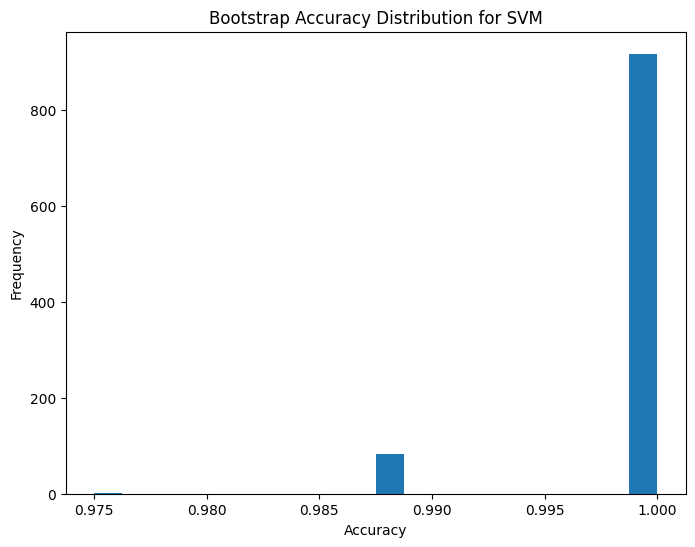

SVM Bootstrap Accuracy Scores:
Mean Accuracy: 0.99895
Standard Deviation: 0.003512121865767177
------------------------------


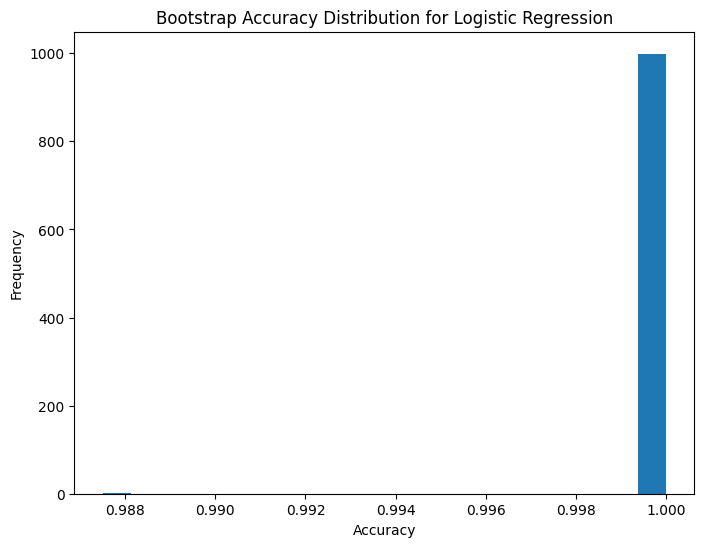

Logistic Regression Bootstrap Accuracy Scores:
Mean Accuracy: 0.9999874999999999
Standard Deviation: 0.0003950870157319763
------------------------------


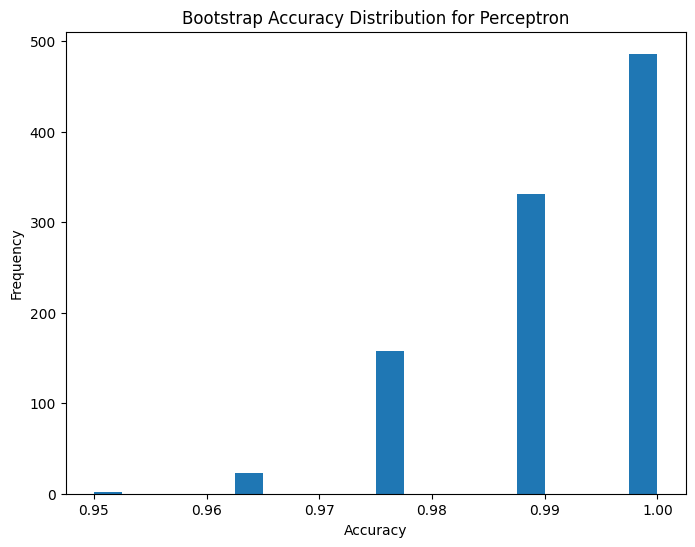

Perceptron Bootstrap Accuracy Scores:
Mean Accuracy: 0.99095
Standard Deviation: 0.010291258426451061
------------------------------


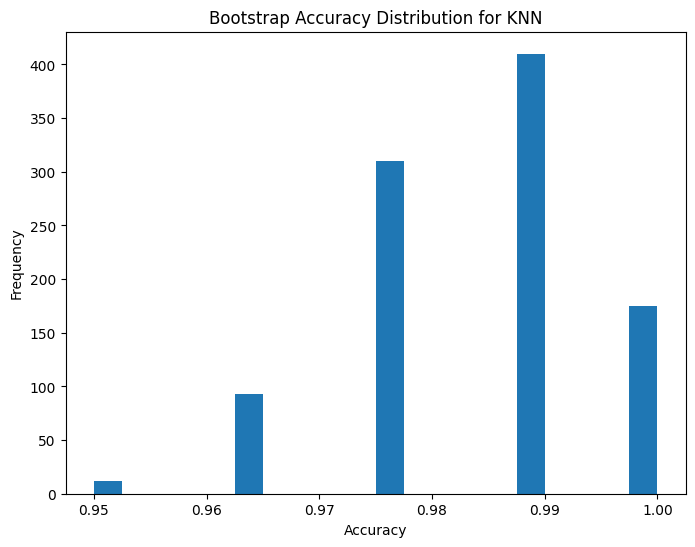

KNN Bootstrap Accuracy Scores:
Mean Accuracy: 0.9830375
Standard Deviation: 0.011439726559232095
------------------------------


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to create bootstrap samples:
def create_bootstrap_samples(data, num_samples=1000):
    bootstrap_samples = []
    for _ in range(num_samples):
        bootstrap_indices = np.random.choice(len(data), len(data), replace=True)
        bootstrap_sample = data.iloc[bootstrap_indices]
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

# Function to train and evaluate a model with bootstrapping:
def evaluate_model_with_bootstrap(model, x_train, y_train, num_samples=1000):  # Assuming x_train, y_train are already scaled
    accuracy_scores = []
    for _ in range(num_samples):
        bootstrap_indices = np.random.choice(len(x_train), len(x_train), replace=True)
        x_boot, y_boot = x_train[bootstrap_indices], y_train.iloc[bootstrap_indices]
        model.fit(x_boot, y_boot)
        predictions_boot = model.predict(x_test)  # Evaluate with x_test
        accuracy_scores.append(accuracy_score(y_test, predictions_boot))
    return accuracy_scores

# Combine features and target for bootstrapping
data = pd.concat([x, y], axis=1)

# Assuming you have your models (svm_model, logreg, perceptron, knn_classifier)
# and data (x, y)
# ... (Your existing code for models and data)
models = [svm_model, logreg, perceptron, knn_classifier]
model_names = ["SVM", "Logistic Regression", "Perceptron", "KNN"]

# Split data into training and testing sets before bootstrapping
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale training data here
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Handle NaN values in x_train and x_test
x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)

for model, name in zip(models, model_names):
    accuracy_scores = evaluate_model_with_bootstrap(model, x_train, y_train)

    # Visualize the results
    plt.figure(figsize=(8, 6))
    plt.hist(accuracy_scores, bins=20)
    plt.title(f"Bootstrap Accuracy Distribution for {name}")
    plt.xlabel("Accuracy")
    plt.ylabel("Frequency")
    plt.show()

    print(f"{name} Bootstrap Accuracy Scores:")
    print(f"Mean Accuracy: {np.mean(accuracy_scores)}")
    print(f"Standard Deviation: {np.std(accuracy_scores)}")
    print("-" * 30)